In [148]:
#librerias

import random as r
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Punto 1

In [149]:
#baraja española
spanish_deck_48 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja espanola modificada
spanish_deck_40_1 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#baraja poker
poker_deck_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja poker modificada
poker_deck_52_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

n = 100000


#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", si prnt es verdadero, imprime el resultado con el nombre "name". De lo contrario retorna la probabilidad
def prob_21(cartas, n, name, prnt):
    prb = 0
    j = 0

    for i in range(n):
        sum = 0 
        brj  = cartas.copy()
        while sum < 21:
            num = r.choice(brj)
            sum += num
            brj.remove(num)
            j += 1

        prb += 1 if sum == 21 else 0
        
    if prnt: 
      print(name, ":", prb, "de", n, "=", prb / n)
    else:
      return prb / n


prob_21(spanish_deck_48, n,   "spanish_deck_48  ", True)
prob_21(spanish_deck_40_1, n, "spanish_deck_40_1", True)
prob_21(poker_deck_52, n,     "poker_deck_52    ", True)
prob_21(poker_deck_52_1, n,   "poker_deck_52_1  ", True)

spanish_deck_48   : 15865 de 100000 = 0.15865
spanish_deck_40_1 : 14983 de 100000 = 0.14983
poker_deck_52     : 14625 de 100000 = 0.14625
poker_deck_52_1   : 14162 de 100000 = 0.14162


# Punto 2

In [150]:
#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", y las cartas "act", en la mano
def prob_21_s(cartas, n, act):
    prb = 0
    j = 0

    n_cartas = []

    for i in range(n):
        sum = 0 if len(act) == 0 else np.sum(act)
        nums = []
        brj  = cartas.copy()
        while sum < 21:
            num = brj[r.randint(0, len(brj) - 1)]
            sum += num
            nums.append(num)
            brj.remove(num)
            j += 1

        if sum == 21:
            prb += 1
            n_cartas.append(len(nums) + len(act))
        
    return [prb, n_cartas]

prb_21_spanish_48 = prob_21_s(spanish_deck_48, n, [])
prb_21_spanish_40_1 = prob_21_s(spanish_deck_40_1, n, [])
prb_21_poker = prob_21_s(poker_deck_52, n, [])
prb_21_poker_1 = prob_21_s(poker_deck_52_1, n, [])

Text(0.5, 1.0, 'x_p_52_1')

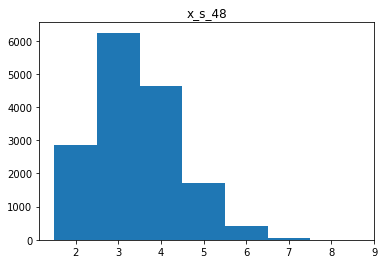

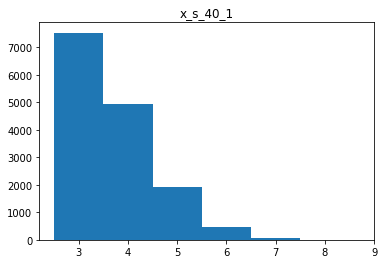

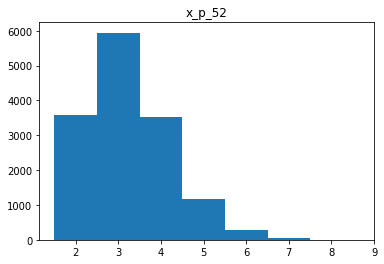

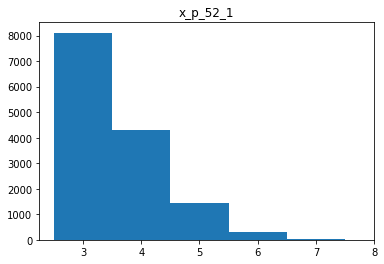

In [151]:
x_s_48 = np.asarray(prb_21_spanish_48[1])
x_s_40_1 = np.asarray(prb_21_spanish_40_1[1])
x_p_52 = np.asarray(prb_21_poker[1])
x_p_52_1 = np.asarray(prb_21_poker_1[1])


#histograma baraja española
bin1= np.arange(x_s_48.min(), x_s_48.max() + 1.5) - 0.5

f1 = plt.figure()

ax1 = f1.add_subplot(111)
ax1.hist(x_s_48, bins = bin1)
ax1.set_xticks(bin1+ 0.5)
ax1.set_title('x_s_48')

#histograma baraja española modificada
bin2= np.arange(x_s_40_1.min(), x_s_40_1.max() + 1.5) - 0.5

f2 = plt.figure()

ax2 = f2.add_subplot(111)
ax2.hist(x_s_40_1, bins = bin2)
ax2.set_xticks(bin2+ 0.5)
ax2.set_title('x_s_40_1')

#histograma baraja poker
bin3 = np.arange(x_p_52.min(), x_p_52.max() + 1.5) - 0.5

f3 = plt.figure()

ax3 = f3.add_subplot(111)
ax3.hist(x_p_52, bins = bin3)
ax3.set_xticks(bin3+ 0.5)
ax3.set_title('x_p_52')

#histograma baraja poker modificada
bin4 = np.arange(x_p_52_1.min(), x_p_52_1.max() + 1.5) - 0.5

f4 = plt.figure()

ax4 = f4.add_subplot(111)
ax4.hist(x_p_52_1, bins = bin4)
ax4.set_xticks(bin4+ 0.5)
ax4.set_title('x_p_52_1')

# Punto 3

In [152]:
#histograma baraja española 48 modificada, sin [7,7,5]
spanish_deck_48_m = [1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#histograma baraja poker modificada sin [7,7,5]
poker_deck_52_m = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,6,7,8,9,10,11,12,13]

#elije aleatoreamente la mitad de un baraja completa "deck", sin la posibilidad de sacar las cartas en la mano "act"
def half_deck(deck, act):
    x = (len(deck) + len(act)) // 2
    h_deck = []

    for k in range(x):
        h_deck.append(deck[r.randint(0, len(deck) - 1)])

    return h_deck

current = [7,7,5]

#calcula las probabilidades con la mitad de la baraja y las cartas en la mano
prb_21_spanish_48_m = prob_21_s(half_deck(spanish_deck_48_m, [7,7,5]), n, current)
prb_21_poker_52_m = prob_21_s(half_deck(poker_deck_52_m, [7,7,5]), n, current)

print("half deck spanish prob:", prb_21_spanish_48_m[0], "de", n, "=", prb_21_spanish_48_m[0] / n)
print("half deck poker prob  :", prb_21_poker_52_m[0], "de", n, "=", prb_21_poker_52_m[0] / n)

half deck spanish prob: 12754 de 100000 = 0.12754
half deck poker prob  : 7728 de 100000 = 0.07728


Text(0.5, 1.0, 'x_p_52_m')

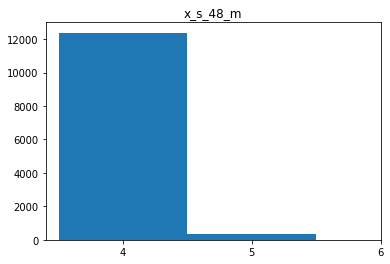

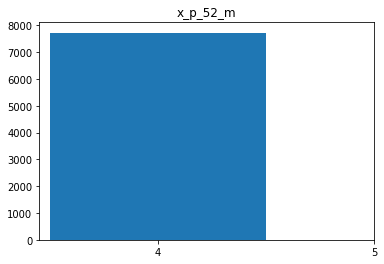

In [153]:
x_s_48_m = np.asarray(prb_21_spanish_48_m[1])
x_p_52_m = np.asarray(prb_21_poker_52_m[1])

#historgrama baraja española modificada sin [7,7,5]
bin5 = np.arange(x_s_48_m.min(), x_s_48_m.max() + 1.5) - 0.5

f5 = plt.figure()

ax5 = f5.add_subplot(111)
ax5.hist(x_s_48_m, bins = bin5)
ax5.set_xticks(bin5 + 0.5)
ax5.set_title('x_s_48_m')

#historgrama baraja poker modificada sin [7,7,5]
bin6 = np.arange(x_p_52_m.min(), x_p_52_m.max() + 1.5) - 0.5

f6 = plt.figure()

ax6 = f6.add_subplot(111)
ax6.hist(x_p_52_m, bins = bin6)
ax6.set_xticks(bin6 + 0.5)
ax6.set_title('x_p_52_m')

#Punto 4


A hotdeck has 4 ones and 4 twos.

Then:
*   4/8 * 3/7 probability to get a one.
*   4/8 probability to get a two. 

The probability to get 21 is 4/8 * 3/7 + 4/8.

In [154]:
print("analytic prob:", 4/8 * 3/7 + 4/8)

analytic prob: 0.7142857142857143


The probability to get 21 with a cold deck is 0

In [155]:
#cartas en la mano
current = [7,7,5]

#mejor baraja posible de 8 cartas
hotdeck = [1,2,1,2,1,2,1,2]

#la peor baraja, es cualquier baraja que no contenga 1 o 2
coldeck = list(np.random.randint(3, max(poker_deck_52) + 1, size = 8))

#numero de intentos
n = 100000

prb_hd = prob_21_s(hotdeck, n, current)
prb_cd = prob_21_s(coldeck, n, current)

print("hotdeck probability:", prb_hd[0] / n)
print("colddeck probability:", prb_cd[0] / n)

hotdeck probability: 0.71641
colddeck probability: 0.0


Text(0.5, 1.0, 'coldeck')

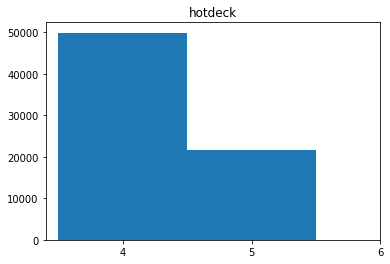

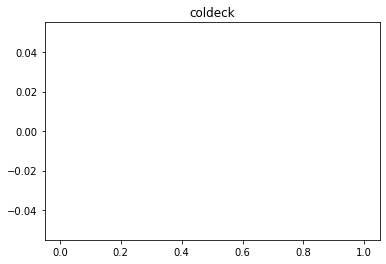

In [156]:
hd = np.asarray(prb_hd[1])
cd = np.asarray(prb_cd[1])

#histograma mejor baraja
bin7 = np.arange(hd.min(), hd.max() + 1.5) - 0.5

f7 = plt.figure()

ax7 = f7.add_subplot(111)
ax7.hist(hd, bins = bin7)
ax7.set_xticks(bin7 + 0.5)
ax7.set_title('hotdeck')

#histograma peor baraja
#bins8 = np.arange(cd.min(), cd.max() + 1.5) - 0.5

f8 = plt.figure()

ax8 = f8.add_subplot(111)
ax8.hist(cd)
# ax8.set_xticks(bins + 0.5)
ax8.set_title('coldeck')

#Punto 5

In [157]:
n=1000
jugadas=600
current = [7,7,5]
hotdeck = [1,2,1,2,1,2,1,2]
promedio_g=0
promedio_p=0
apuesta_c=1000
apuesta_f=10
nor=st.norm(0,1)
ivscdf=nor.ppf(0.1)

for i in range(n):

  sum=0
  total_g=0
  total_p=0

  for j in range(jugadas):

    num_r=np.random.normal()

    if num_r <= ivscdf:
      deck = hotdeck.copy()
      mano=current
      apuesta=apuesta_c
    else:
      mano=[0]
      deck = poker_deck_52.copy()
      apuesta=apuesta_f
    sum=np.sum(mano)

    while sum<21:
      a=r.choice(deck)
      sum+=a
      deck.remove(a)
    
    if sum==21:
      total_g+=apuesta
    else:
      total_p+=apuesta
  
  promedio_g+=total_g
  promedio_p+=total_p

print("Ganancias: ",(promedio_g/n))
print("Perdidas: ",(promedio_p/n))
print('Total: ',(promedio_g/n)-(promedio_p/n))

    
    


Ganancias:  43611.57
Perdidas:  21811.2
Total:  21800.37


In [158]:
games = 200
n=1000

x_rand = st.norm(0,1)
ind = x_rand.ppf(0.1)
hotdeck = [1,2,1,2,1,2,1,2]
current = [7,7,5]


averProfit = 0
averLosses = 0

for i in range(n):

  totalLosses = 0
  totalProfit = 0
  
  for j in range(games):
    numNormal = np.random.normal()

    if numNormal <= ind:
      deck = hotdeck.copy()
      bet = 1000
      hand = current

    else:
      bet = 10
      deck = poker_deck_52.copy()
      hand = [0]
      
    sum = np.sum(hand)

    while sum < 21:
      card = r.choice(deck)
      deck.remove( card )
      sum += card
    
    if sum == 21:
      totalProfit += bet

    else:
      totalLosses += bet 
   
  averProfit += totalProfit
  averLosses += totalLosses

print("estimated wins: ",(averProfit / n))
print("estimated losses: ",( averLosses / n))

estimated wins:  14477.2
estimated losses:  7352.5


In [159]:
#baraja española
spanish_deck_48 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja espanola modificada
spanish_deck_40_1 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#baraja poker
poker_deck_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja poker modificada
poker_deck_52_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

#simula n veces el fin de semana de ben en el casino, con una hotdeck, coldeck, mano actual para la hotdeck "act_hotdeck", 
#mano actual para la coldeck "act_coldeck" y una probabilidad de que haya una hotdeck
def ben_sim(n, games, hotdeck, act_hotdeck, coldeck, act_coldeck, prb_hotdeck):
  n_cartas = []
  cash = 0

  for x in range(n):
    prb = 0
    j = 0

    for i in range(games):
      p = r.random()

      act = []
      brj = []
      bet = 10

      if p < prb_hotdeck:
        act = act_hotdeck.copy()
        brj = hotdeck.copy()
        bet = 1000

      else:
        act = act_coldeck.copy()
        brj = coldeck.copy()
        bet = 10

      sum = 0 if len(act) == 0 else np.sum(act)
      nums = []

      while sum < 21:
        num = brj[r.randint(0, len(brj) - 1)]
        sum += num
        nums.append(num)
        brj.remove(num)
        j += 1

      if sum == 21:
        prb += 1
        n_cartas.append(len(nums) + len(act))
        cash += bet
      else:
        cash -= bet

  return [cash / n, n_cartas]
  
#mano para la hotdeck y probabilidad de una hotdeck
act_hot = [7,7,5]
hotdeck_prob = 1/10

#cantidad de simulaciones
n = 1000

#candidad de juegos, durante le fin de semana
days = 3
hours = 10
game_time = 3

games_hour = 60 // game_time
total_games = (hours * games_hour) * 3

#simular el fin de semana de ben con las 4 barajas
cash_ben_s   = ben_sim(n, total_games, hotdeck, act_hot, spanish_deck_48,   [], hotdeck_prob)
cash_ben_s_m = ben_sim(n, total_games, hotdeck, act_hot, spanish_deck_40_1, [], hotdeck_prob)
cash_ben_p   = ben_sim(n, total_games, hotdeck, act_hot, poker_deck_52,     [], hotdeck_prob)
cash_ben_p_m = ben_sim(n, total_games, hotdeck, act_hot, poker_deck_52_1,   [], hotdeck_prob)

#imprimir los resultados
print("ben cash sapnish deck    : $", cash_ben_s[0],   "Total games:", total_games * n)
print("ben cash sapnish mod deck: $", cash_ben_s_m[0], "Total games:", total_games * n)
print("ben cash poker deck      : $", cash_ben_p[0],   "Total games:", total_games * n)
print("ben cash poker mod deck  : $", cash_ben_p_m[0], "Total games:", total_games * n)

ben cash sapnish deck    : $ 22060.05 Total games: 600000
ben cash sapnish mod deck: $ 22032.11 Total games: 600000
ben cash poker deck      : $ 21966.6 Total games: 600000
ben cash poker mod deck  : $ 21761.91 Total games: 600000


Text(0.5, 1.0, 'ben_poker_mod_deck')

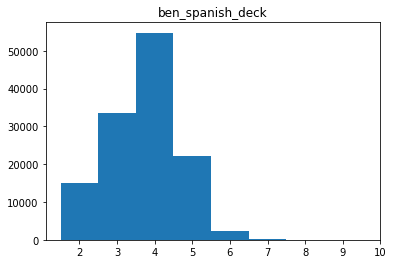

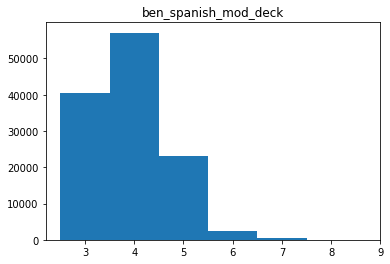

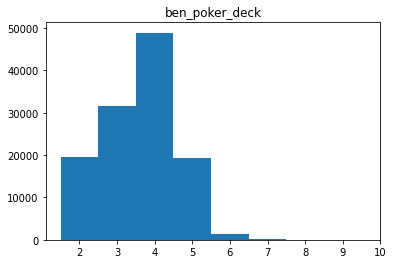

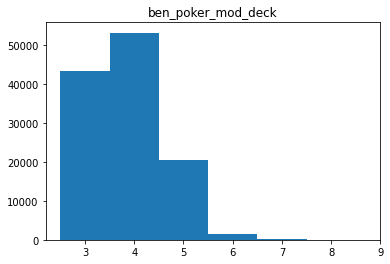

In [160]:
x_cash_ben_s = np.asarray(cash_ben_s[1])
x_cash_ben_s_m = np.asarray(cash_ben_s_m[1])
x_cash_ben_p = np.asarray(cash_ben_p[1])
x_cash_ben_p_m = np.asarray(cash_ben_p_m[1])

#histograma simulacion Ben baraja española
bin8 = np.arange(x_cash_ben_s.min(), x_cash_ben_s.max() + 1.5) - 0.5

f8 = plt.figure()

ax8 = f8.add_subplot(111)
ax8.hist(x_cash_ben_s, bins = bin8)
ax8.set_xticks(bin8 + 0.5)
ax8.set_title('ben_spanish_deck')

#histograma simulacion Ben baraja española modificada
bin9 = np.arange(x_cash_ben_s_m.min(), x_cash_ben_s_m.max() + 1.5) - 0.5

f9 = plt.figure()

ax9 = f9.add_subplot(111)
ax9.hist(x_cash_ben_s_m, bins = bin9)
ax9.set_xticks(bin9 + 0.5)
ax9.set_title('ben_spanish_mod_deck')

#histograma simulacion Ben baraja poker
bin10 = np.arange(x_cash_ben_p.min(), x_cash_ben_p.max() + 1.5) - 0.5

f10 = plt.figure()

ax10 = f10.add_subplot(111)
ax10.hist(x_cash_ben_p, bins = bin10)
ax10.set_xticks(bin10 + 0.5)
ax10.set_title('ben_poker_deck')

#histograma simulacion Ben baraja poker modificada
bin11 = np.arange(x_cash_ben_p_m.min(), x_cash_ben_p_m.max() + 1.5) - 0.5

f11 = plt.figure()

ax11 = f11.add_subplot(111)
ax11.hist(x_cash_ben_p_m, bins = bin11)
ax11.set_xticks(bin11 + 0.5)
ax11.set_title('ben_poker_mod_deck')

In [161]:
hotdeck = [1,1,1,1,2,2,2,2]

test = [1,1,1,1,2,2,2,2,3,5]

act = [5,7,7]


def draw(deck, n):
    nd = []

    for x in range(n):
        nd.append(deck.pop(r.randint(0, len(deck) - 1)))

    return nd

def check_deck(a, b, max_errs):
    cpy = a.copy()

    errs = 0

    for y in b:
        try:
            cpy.remove(y)
        except:
            if errs <= max_errs:
                errs += 1
            else:
                break

    return errs <= max_errs

def prb_hd(deck, n_cards, hotdeck, act, n):
    prb = 0

    for x in range(n):
        d = draw(spanish_deck_48.copy(), n_cards + len(act))
        hand = draw(d, len(act))

        cpy = hotdeck.copy()
        max_errs = n_cards - len(hotdeck)
        
        if check_deck(hotdeck, d, max_errs):
            prb += 1 if check_deck(act, hand, 0) else 0

    return prb/n

prob_hotdeck = prb_hd(spanish_deck_48, 12, hotdeck, act, 100000)

cash_ben_s_prob = ben_sim(1000, 600, hotdeck, act_hot, spanish_deck_48, [], x)
cash_ben_s_prob[0]

-4110.86

In [162]:
1 / (mt.comb(40,8+3) * mt.comb(8,3))

7.72434109096448e-12